# Sample Generation
Notebook for initial design and then demonstration of sample generation for metal sheet defect classifier and growth tracker.

In [5]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import numpy.random as r
import matplotlib.pyplot as plt
from PIL import Image


import sys; sys.path.append('./*'); sys.path.append('..')
from defects.Defect import Defect
from defects.Bubbles import Bubbles
from defects.Line import Line

import glob

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
d = '../ml_data/metal_sheets'
df = None
id = 0
for i in range(3000):
    choice = r.randint(0,3)
    match choice:
        case 0: defect = Defect(id=id)
        case 1: defect = Line(divergence_odds=10, growth_odds=70, growth_factor=1, initial_growth=1, id=id); defect.advance(50)
        case 2: defect = Bubbles(id=id); defect.advance(50)
    defect.save_image(20, d)
    if not isinstance(df, pd.DataFrame): df = pd.DataFrame(defect.row());
    else: df = pd.concat([df,defect.row()])
    id += 1
    
df.target[df.target=='Defect'] = 0
df.target[df.target=='Line'] = 1
df.target[df.target=='Bubbles'] = 2
df.to_csv(d+'/metadata.csv')

/tmp/ipykernel_1889578/2246033724.py:15: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.target[df.target=='Defect'] = 0
/tmp/ipykernel_1889578/2246033724.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

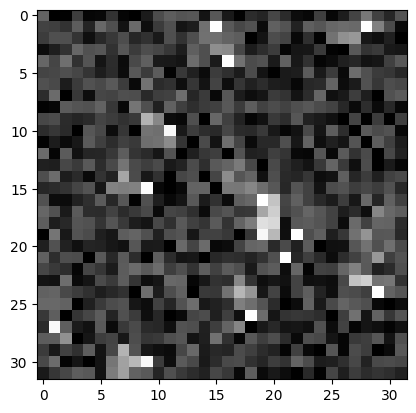

In [10]:
#b = Bubbles()
#b.save_image('../../../ml_data/metal_sheets')

img = Image.open('/home/sms/Documents/hobbies/projects/ml_data/metal_sheets/Bubbles_2.png')
array = np.asarray(img)
plt.imshow(array)